In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [90]:
#Read the dataset
data=pd.read_csv('car_age_price.csv')

In [91]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [92]:
data.shape

(112, 2)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [94]:
data.describe() 

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [95]:
#Misssing values Handling
data.isna().sum()

Year     0
Price    0
dtype: int64

In [96]:
data.columns

Index(['Year', 'Price'], dtype='object')

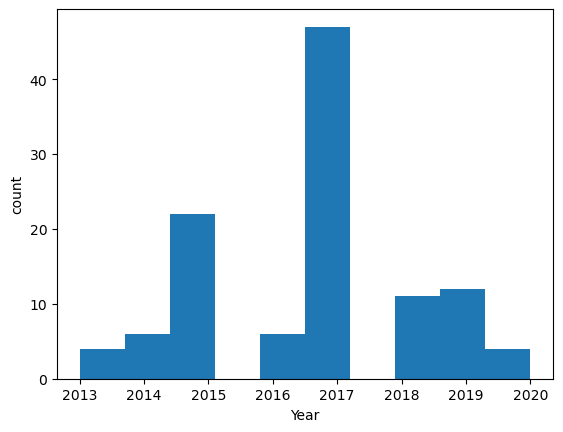

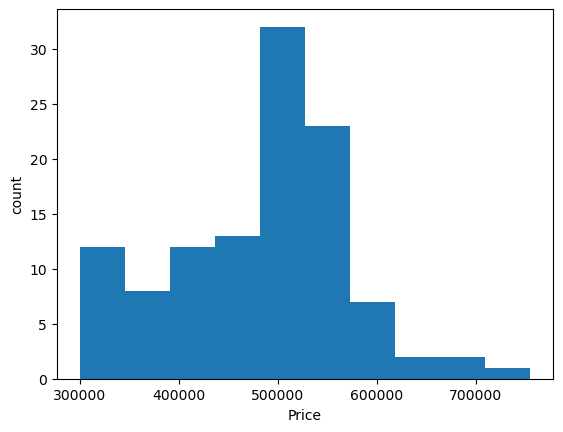

In [97]:
for col_name in ['Year', 'Price']:
        plt.hist([data[col_name]])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [98]:
#Checking Co-relations
corr_matrix=data.corr()

In [99]:
corr_matrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


[]

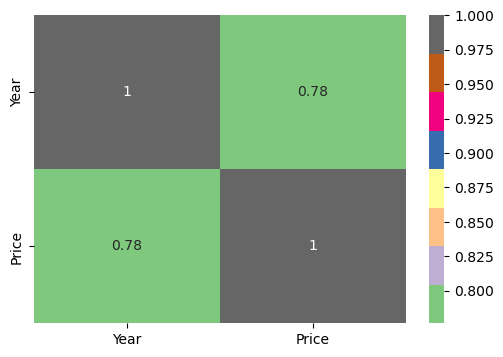

In [16]:
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='Accent')
plt.plot()

In [27]:
#Managing Outliers

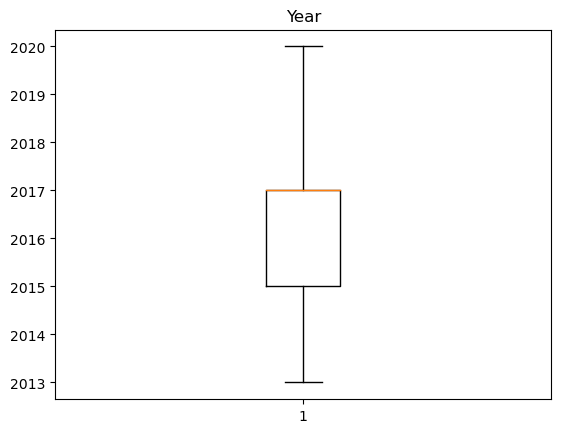

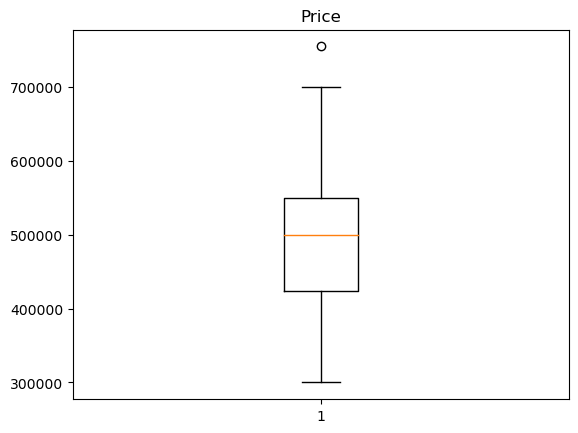

In [100]:
for i in ['Year', 'Price']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [22]:
#To manage the outliers

In [101]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')

In [102]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [103]:
#Finding IQR
IQR=Q3-Q1

In [104]:
IQR

127500.0

In [105]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [106]:
print("low_lim",low_lim)
print("up_lim",up_lim)

low_lim 231250.0
up_lim 741250.0


In [107]:
#Findng Outlier values and storing in a list
outlier=[]
for x in data['Price']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [108]:
outlier

[755000]

In [112]:
ind1=data['Price']> up_lim
data.loc[ind1].index

Int64Index([1], dtype='int64')

In [110]:
data1=data

In [111]:
data1

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [25]:
#Here not dropping the outlier values since the data seems valid
data1

,Year,Price
1,2019,755000
2,2019,700000
10,2019,500000
13,2019,600000
18,2019,500000
21,2019,500000
30,2019,650000
40,2019,525000
41,2019,600000
43,2019,550000


In [113]:
data.drop([1])

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
#To compare the performance of linear regression and lasso regression models, we can use a metric such as mean squared error (MSE). 
#The model with the lower MSE is considered to be performing better.
#Also, in addition to Mean Squared Error (MSE), it is also a good practice to check the R-squared (R2) score when evaluating a regression model's performance.
#R2 score ranges from 0 to 1, with higher values indicating better performance. A perfect model has an R2 score of 1, while a model that performs no better than the baseline model has an R2 score of 0

In [114]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
# converting Year  column to a string
#data1=data
#data1['Year'] = data['Year'].map(str)
#print(data1)
#print(data1.dtypes)

In [116]:
x = data.drop(['Price'], axis = 1)
y = data['Price']

In [117]:
print(x,y)

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns] 0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


In [75]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data1['Year']=le.fit_transform(data1['Year'])

In [152]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [153]:
x_train,y_train

(     Year
 66   2017
 90   2017
 62   2017
 22   2015
 85   2015
 ..    ...
 106  2015
 14   2017
 92   2017
 51   2018
 102  2015
 
 [89 rows x 1 columns],
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
         ...  
 106    300000
 14     475000
 92     520000
 51     550000
 102    350000
 Name: Price, Length: 89, dtype: int64)

In [154]:
# Create and train a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [155]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [156]:
# Compare the performance of the two models using mean squared error
# Compare the performance of the two models using R2-Score

mse_lin_reg = mean_squared_error(y_test, predictions)
R2_lin_reg = r2_score(y_test, predictions)
print("Mean squared error of linear regression: ", mse_lin_reg)
print("R2_score of linear regression: ", R2_lin_reg)


Mean squared error of linear regression:  4326906256.829671
R2_score of linear regression:  0.36759313425902185


In [ ]:
#Here noticed MSE value is on higher side, tried by appliying Label encoding to variable "Year" after converting to categorical values. 
#But no change in resullts.

In [125]:
# Create and train a lasso regression model
data2=data
x1 = data2.drop(['Price'], axis = 1)
y1 = data2['Price']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

In [126]:
print(x1,y1)

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns] 0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


In [127]:
# Create and train a lasso regression model
lasso_reg = Lasso(alpha=0.01)
model_lasso=lasso_reg.fit(x1_train, y1_train)
predictions_lasso=model_lasso.predict(x1_test)

In [128]:
predictions_lasso

array([600775.90247035, 505558.77509837, 553167.33878435, 553167.33878435,
       553167.33878435, 410341.64772639, 505558.77509837, 553167.33878435,
       600775.90247035, 600775.90247035, 315124.52035441, 505558.77509837,
       410341.64772639, 648384.46615633, 553167.33878435, 600775.90247035,
       315124.52035441, 410341.64772639, 505558.77509837, 505558.77509837,
       505558.77509837, 505558.77509837, 505558.77509837])

In [129]:
# Compare the performance of the two models using mean squared error
mse_lasso_reg = mean_squared_error(y1_test, predictions_lasso)
R2_lasso_reg = r2_score(y1_test, predictions_lasso)
print("Mean squared error of lasso regression: ", mse_lasso_reg)
print("R2_score of of lasso regression: ", R2_lasso_reg)

Mean squared error of lasso regression:  4326905791.966492
R2_score of of lasso regression:  0.3675932022019466


In [131]:
# Predict the price of a 2022 model second-hand grand i10 using the linear regression model
predicted_price_lin_reg = lr.predict([['2022']])
print("Predicted price of a 2022 model second-hand grand i10 (linear regression): ", predicted_price_lin_reg[0])

Predicted price of a 2022 model second-hand grand i10 (linear regression):  743601.6159450412


C:\Users\santh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\santh\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [132]:
# Predict the price of a 2022 model second-hand grand i10 using the lasso regression model
predicted_price_lasso_reg = lasso_reg.predict([['2022']])
print("Predicted price of a 2022 model second-hand grand i10 (lasso regression): ", predicted_price_lasso_reg[0])

Predicted price of a 2022 model second-hand grand i10 (lasso regression):  743601.5935283154


C:\Users\santh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\santh\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
#Since MSE is high StandardScaler is applied on data and checked but no change

In [133]:
data1

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [134]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
xs=x
xs=std_scaler.fit_transform(xs)

In [144]:
xs=pd.DataFrame(xs)

In [145]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(xs,y,random_state=42,test_size=0.2)

In [146]:
# Create and train a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [147]:

mse_chk = mean_squared_error(Y_test, predictions)
R2_chk = r2_score(Y_test, predictions)
print("Mean squared error of linear regression: ", mse_chk)
print("R2_score of linear regression: ", R2_chk)


Mean squared error of linear regression:  4326906256.829962
R2_score of linear regression:  0.3675931342589793


(array([2., 0., 3., 0., 0., 8., 0., 5., 4., 1.]),
 array([315124.50567235, 348450.503138  , 381776.50060366, 415102.49806931,
        448428.49553497, 481754.49300062, 515080.49046627, 548406.48793193,
        581732.48539758, 615058.48286323, 648384.48032889]),
 <BarContainer object of 10 artists>)

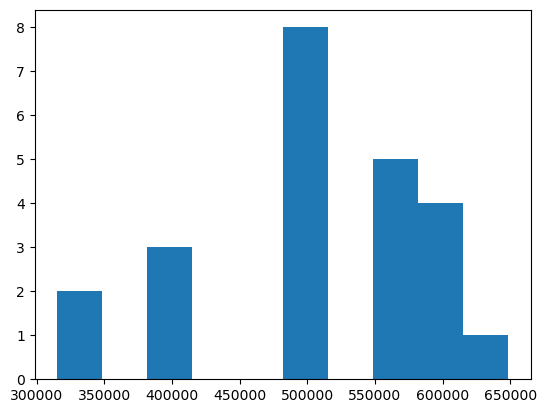

In [157]:
plt.hist(predictions)